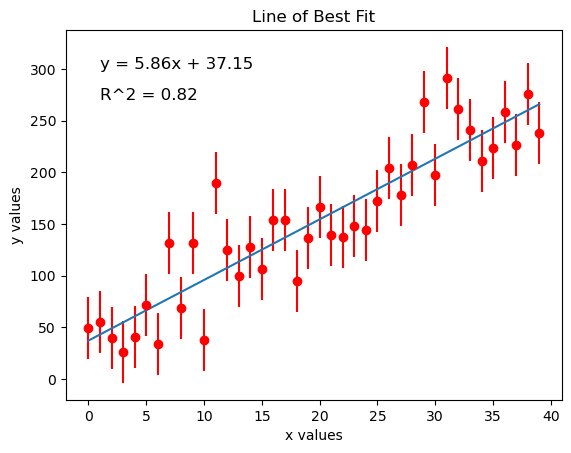

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import os
from astropy.table import Table
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import stats


specdir = '/Users/EvanB.LAPTOP-8CHCIOMA/astr503/my_repositories/Intro_Python_Project' #'/astr503/my_repositories/Intro_Python_Project/'
os.chdir(specdir)

data = Table.read('data.v3.txt',format='ascii', names=('x','y','dy'))

x = np.array(data['x'])
y = np.array(data['y'])
dy = np.array(data['dy'])

a, b = np.polyfit(x, y, 1)

def r2(x, y):
    return r_value**2

plt.title('Line of Best Fit')
plt.xlabel('x values')
plt.ylabel('y values')
plt.errorbar(x, y, color = 'r', label = 'data', yerr=dy, fmt="o")
plt.plot(x, a*x+b)
plt.text(1, 300, 'y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b), size=12)
plt.text(1, 270, 'R^2 = ' + '{:.2f}'.format(r2(x,y)), size=12)
plt.show()